In [718]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import talib

In [719]:
input_data = 'data00/10.csv'

In [720]:
original_data_full = pd.read_csv(input_data)
original_data_full.shape

(766, 4)

In [721]:
original_data = original_data_full.iloc[-160:-80,:]
original_data.shape

(80, 4)

In [722]:
shortWindow = talib.DEMA(original_data["close"], timeperiod=9)
longWindow = talib.DEMA(original_data["close"], timeperiod=21)

In [723]:
split_count = 4
input_length = int(original_data.shape[0]/split_count)

In [724]:
data_array = []
for i in range(0, split_count):
    data_array.append(original_data.iloc[i*input_length : input_length*(i+1), :])

In [725]:
x = []
y = []
for i in range(0, split_count):
    close = data_array[i]['close']
    smallest=close.nsmallest(n=1)
    x.append(smallest.index[0])
    y.append(smallest.values[0])

In [726]:
X = np.asarray(x)
X = X.reshape(-1,1)
Y = np.asarray(y)

In [727]:
support_model = LinearRegression()
support_model.fit(X, Y)

LinearRegression()

In [728]:
support_line_count = np.asarray(range(shortWindow.index[0], shortWindow.index[0]+original_data.shape[0]))
support_line = support_model.predict(support_line_count.reshape(-1,1))

In [729]:
x = []
y = []
for i in range(0, split_count):
    close = data_array[i]['close']
    largest=close.nlargest(n=1)
    x.append(largest.index[0])
    y.append(largest.values[0])

In [730]:
X = np.asarray(x)
X = X.reshape(-1,1)
Y = np.asarray(y)

In [731]:
resistance_model = LinearRegression()
resistance_model.fit(X, Y)

LinearRegression()

In [732]:
resistance_line_count = np.asarray(range(shortWindow.index[0], shortWindow.index[0]+original_data.shape[0]))
resistance_line = resistance_model.predict(resistance_line_count.reshape(-1,1))

In [733]:
support_model.predict([[600]])

array([534.00188427])

In [734]:
resistance_model.predict([[600]])

array([534.5000856])

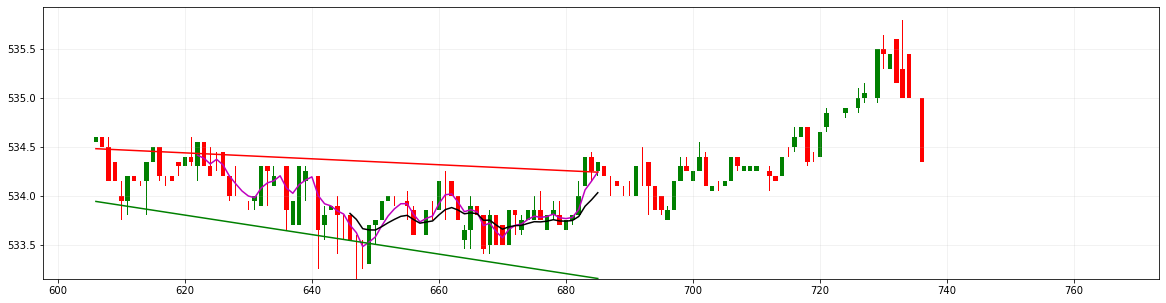

In [735]:
def candlestick(t, o, h, l, c):
    plt.figure(figsize=(20,5))
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.7, color=color)
    plt.bar(x=t, height=h-l, bottom=l, width=0.1, color=color)

candlestick(
    original_data_full.iloc[-160:,:].index,
    original_data_full.iloc[-160:,:]["open"],
    original_data_full.iloc[-160:,:]["high"],
    original_data_full.iloc[-160:,:]["low"],
    original_data_full.iloc[-160:,:]["close"]
)

plt.grid(alpha=0.2)
resistance = pd.Series(resistance_line, index =range(shortWindow.index[0],shortWindow.index[0]+len(resistance_line)))
support = pd.Series(support_line, index =range(shortWindow.index[0],shortWindow.index[0]+len(support_line)))
plt.plot(shortWindow, c='m')
plt.plot(longWindow, c='k')
plt.plot(resistance, c='r')
plt.plot(support, c='g')

In [736]:
price_range = [[150], [250], [350], [450]]
price_margin = [0.70, 1.20, 1.60, 2.0]
price_model = LinearRegression()
price_model.fit(price_range, price_margin)

LinearRegression()

In [737]:
price_model.predict([[450]])

array([2.02])

In [738]:
price_range = [[150], [250], [350], [450]]
price_margin = [0.60, 0.80, 1.0, 1.20]
price_model.fit(price_range, price_margin)

LinearRegression()

In [739]:
price_model.predict([[450]])[0]

1.2